In [1]:
import matplotlib.pyplot as plt
import plotly.express as px
import pandas as pd
import numpy as np

import os
import glob
from pathlib import Path
import torch
import network_utils as networkUtils

# Prune by Latency

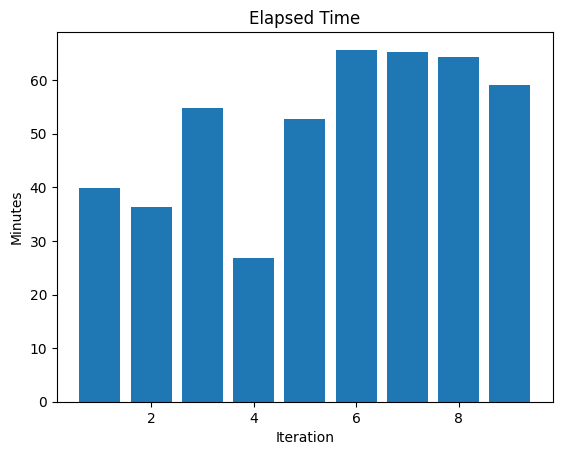

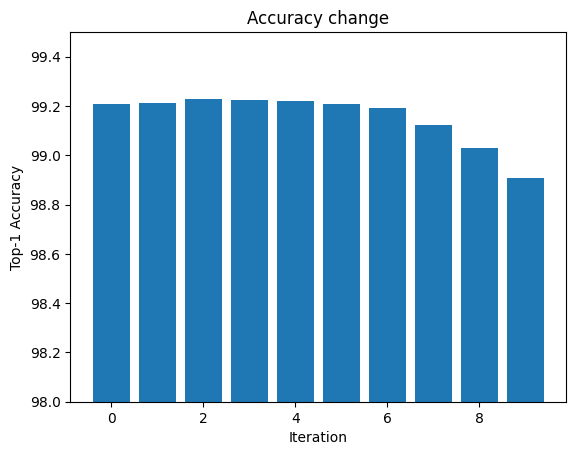

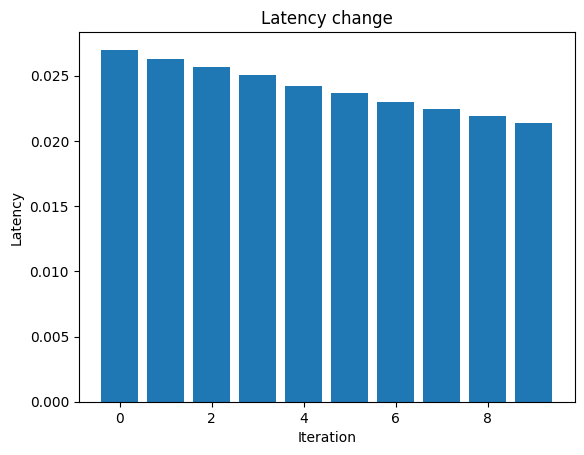

Files already downloaded and verified
Files already downloaded and verified
Files already downloaded and verified
Files already downloaded and verified
Files already downloaded and verified
Files already downloaded and verified
Files already downloaded and verified
Files already downloaded and verified
Files already downloaded and verified
Files already downloaded and verified
Files already downloaded and verified
Files already downloaded and verified
Files already downloaded and verified
Files already downloaded and verified
Files already downloaded and verified
Files already downloaded and verified
Files already downloaded and verified
Files already downloaded and verified
Files already downloaded and verified
Files already downloaded and verified


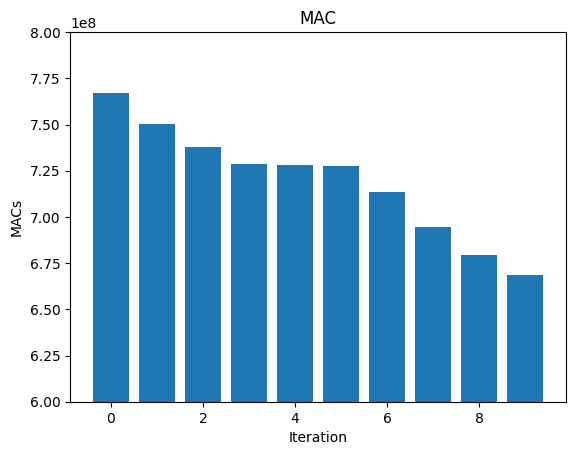

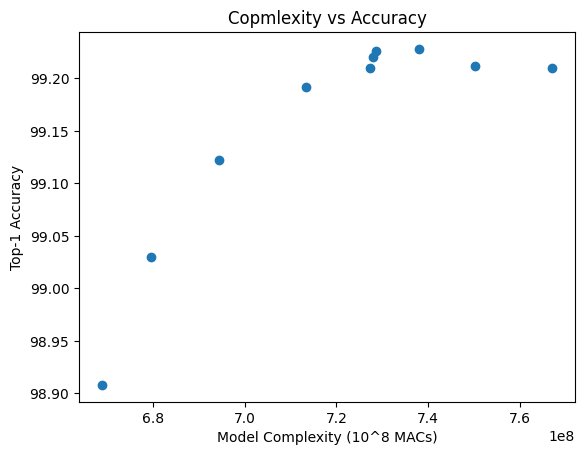

In [2]:
latency_logs = open("models/alexnet/fed/core-2-prune-by-latency/logs.txt","r").read()
latency_logs

elapsed_times = [float(line.split(" ")[-2])/60 for line in list(filter(lambda line: "Iteration" in line and "finished" in line, latency_logs.split("\n")))]
idx = np.arange(1,len(elapsed_times)+1)

#Elapsed Time
plt.bar(idx, elapsed_times)
plt.xlabel("Iteration")
plt.ylabel("Minutes")
plt.title("Elapsed Time")
plt.show()

#Accuracy vs Latency
latency_best_models = pd.read_csv("models/alexnet/fed/core-2-prune-by-latency/master/history.txt", delimiter=",")

plt.bar(latency_best_models["Iteration"], latency_best_models["Accuracy"])
plt.ylim(98,99.5)
plt.xlabel("Iteration")
plt.ylabel("Top-1 Accuracy")
plt.title("Accuracy change")
plt.show()

plt.bar(latency_best_models["Iteration"], latency_best_models["Resource"])
plt.xlabel("Iteration")
plt.ylabel("Latency")
plt.title("Latency change")
plt.show()

#Best model each iteration
model_paths = glob.glob("models/alexnet/fed/core-2-prune-by-latency/master/*.pth.tar")

flops_arr = []
idx = []

for model_path in model_paths:
    model = torch.load(model_path)
    network_utils = networkUtils.__dict__["alexnet"](model, (3,224,224), "data/")
    network_def = network_utils.get_network_def_from_model(model)
    flops = network_utils._compute_weights_and_flops(network_def)
    total_flops = flops[1] + flops[3]
    flops_arr.append(total_flops)
    idx.append(int(Path(model_path).stem.split("_")[1]))

plt.bar(idx, flops_arr)
plt.ylim(6*10**8,8*10**8)
plt.xlabel("Iteration")
plt.ylabel("MACs")
plt.title("MAC")
plt.show()

#Accuracy vs MAC
flops_ordered = [x for y, x in sorted(zip(idx, flops_arr))]
acc = latency_best_models["Accuracy"].tolist()

plt.scatter(flops_ordered, acc)
plt.ylabel("Top-1 Accuracy")
plt.xlabel("Model Complexity (10^8 MACs)")
plt.title("Complexity vs Accuracy")
plt.show()

# Prune by MAC

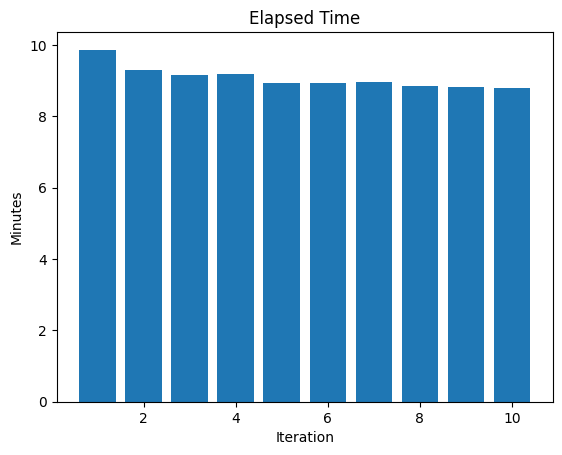

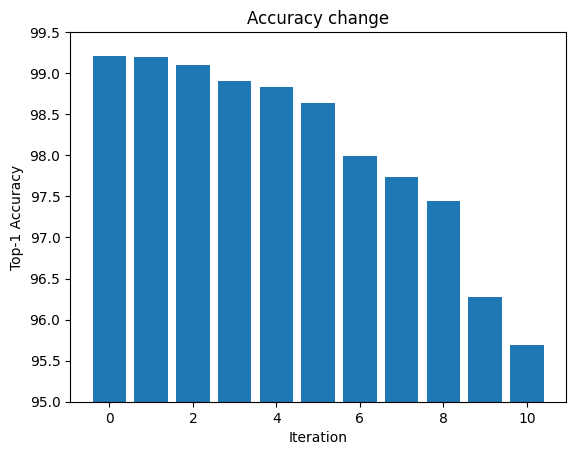

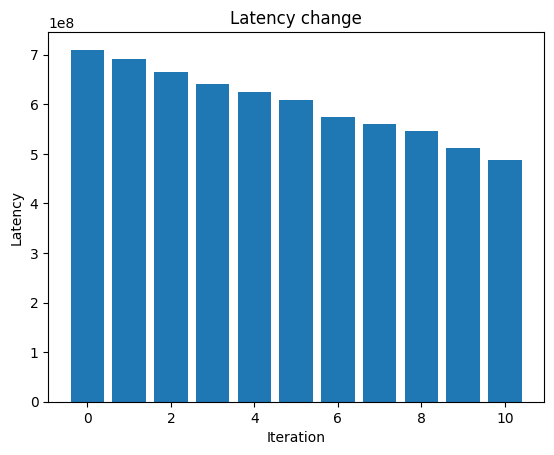

Files already downloaded and verified
Files already downloaded and verified
Files already downloaded and verified
Files already downloaded and verified
Files already downloaded and verified
Files already downloaded and verified
Files already downloaded and verified
Files already downloaded and verified
Files already downloaded and verified
Files already downloaded and verified
Files already downloaded and verified
Files already downloaded and verified
Files already downloaded and verified
Files already downloaded and verified
Files already downloaded and verified
Files already downloaded and verified
Files already downloaded and verified
Files already downloaded and verified
Files already downloaded and verified
Files already downloaded and verified
Files already downloaded and verified
Files already downloaded and verified


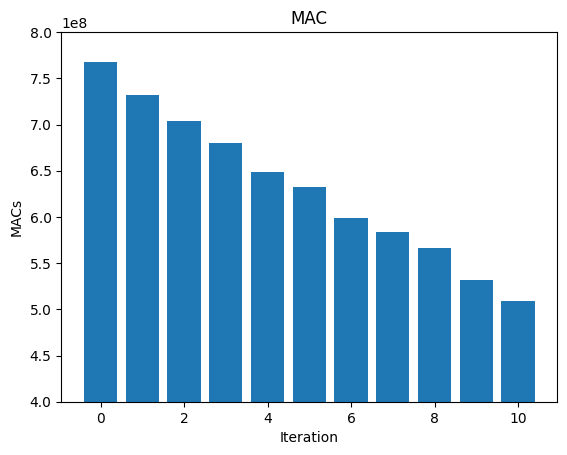

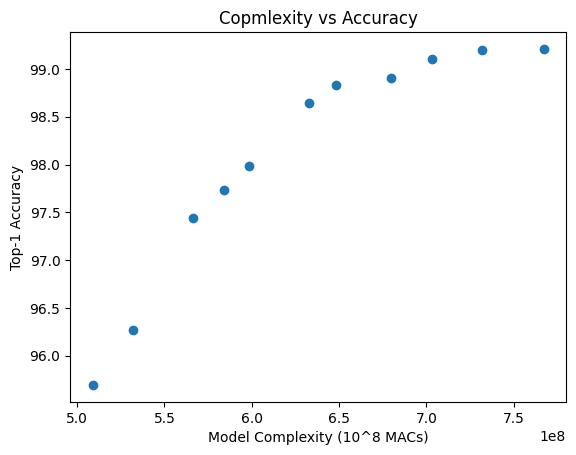

In [3]:
parent_folder = "models/alexnet/fed/core_1_prune-by-mac"

latency_logs = open(os.path.join(parent_folder,"logs.txt"),"r").read()
latency_logs

elapsed_times = [float(line.split(" ")[-2])/60 for line in list(filter(lambda line: "Iteration" in line and "finished" in line, latency_logs.split("\n")))]
idx = np.arange(1,len(elapsed_times)+1)

#Elapsed Time
plt.bar(idx, elapsed_times)
plt.xlabel("Iteration")
plt.ylabel("Minutes")
plt.title("Elapsed Time")
plt.show()

#Accuracy vs Latency
latency_best_models = pd.read_csv(os.path.join(parent_folder,"master/history.txt"), delimiter=",")

plt.bar(latency_best_models["Iteration"], latency_best_models["Accuracy"])
plt.ylim(95,99.5)
plt.xlabel("Iteration")
plt.ylabel("Top-1 Accuracy")
plt.title("Accuracy change")
plt.show()

plt.bar(latency_best_models["Iteration"], latency_best_models["Resource"])
plt.xlabel("Iteration")
plt.ylabel("Latency")
plt.title("Latency change")
plt.show()

#Best model each iteration
model_paths = glob.glob(os.path.join(parent_folder,"master/*.pth.tar"))

flops_arr = []
idx = []

for model_path in model_paths:
    model = torch.load(model_path)
    network_utils = networkUtils.__dict__["alexnet"](model, (3,224,224), "data/")
    network_def = network_utils.get_network_def_from_model(model)
    flops = network_utils._compute_weights_and_flops(network_def)
    total_flops = flops[1] + flops[3]
    flops_arr.append(total_flops)
    idx.append(int(Path(model_path).stem.split("_")[1]))

plt.bar(idx, flops_arr)
plt.ylim(4*10**8,8*10**8)
plt.xlabel("Iteration")
plt.ylabel("MACs")
plt.title("MAC")
plt.show()

#Accuracy vs MAC
flops_ordered = [x for y, x in sorted(zip(idx, flops_arr))]
acc = latency_best_models["Accuracy"].tolist()

plt.scatter(flops_ordered, acc)
plt.ylabel("Top-1 Accuracy")
plt.xlabel("Model Complexity (10^8 MACs)")
plt.title("Copmlexity vs Accuracy")
plt.show()

# Latency (3 Rounds of FL)

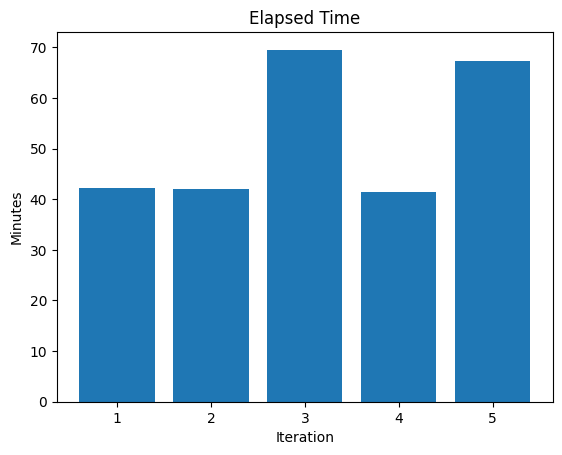

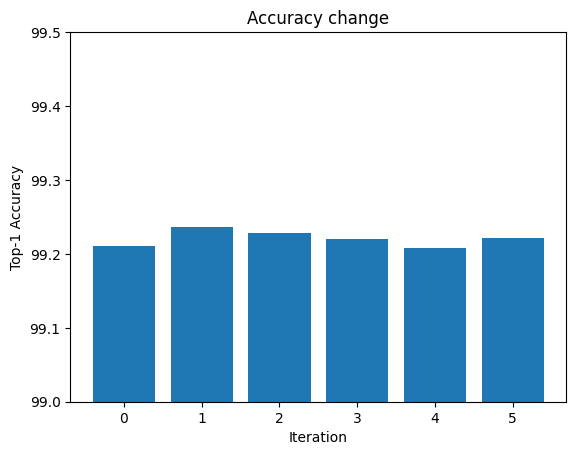

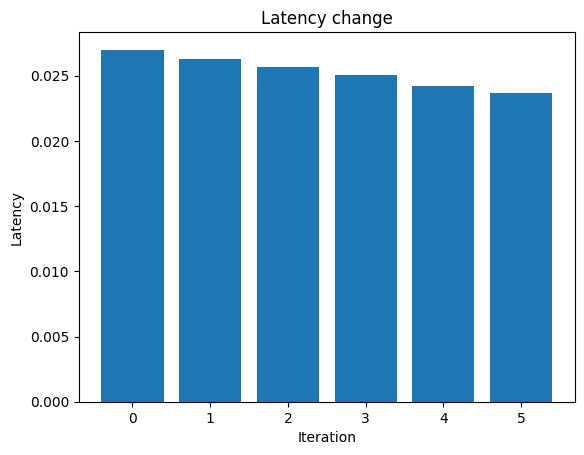

Files already downloaded and verified
Files already downloaded and verified
Files already downloaded and verified
Files already downloaded and verified
Files already downloaded and verified
Files already downloaded and verified
Files already downloaded and verified
Files already downloaded and verified
Files already downloaded and verified
Files already downloaded and verified
Files already downloaded and verified
Files already downloaded and verified


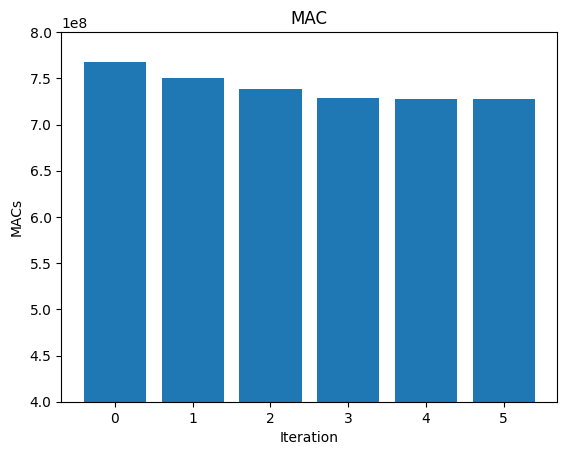

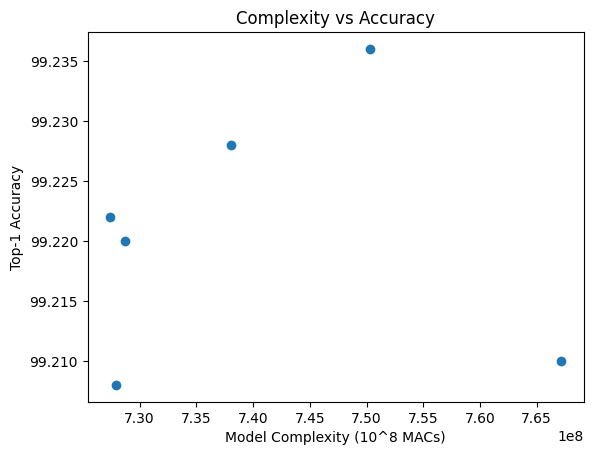

In [4]:
parent_folder = "models/alexnet/fed/core-3-prune-by-latency"

latency_logs = open(os.path.join(parent_folder,"logs.txt"),"r").read()
latency_logs

elapsed_times = [float(line.split(" ")[-2])/60 for line in list(filter(lambda line: "Iteration" in line and "finished" in line, latency_logs.split("\n")))]
idx = np.arange(1,len(elapsed_times)+1)

#Elapsed Time
plt.bar(idx, elapsed_times)
plt.xlabel("Iteration")
plt.ylabel("Minutes")
plt.title("Elapsed Time")
plt.show()

#Accuracy vs Latency
latency_best_models = pd.read_csv(os.path.join(parent_folder,"master/history.txt"), delimiter=",")

plt.bar(latency_best_models["Iteration"], latency_best_models["Accuracy"])
plt.ylim(99,99.5)
plt.xlabel("Iteration")
plt.ylabel("Top-1 Accuracy")
plt.title("Accuracy change")
plt.show()

plt.bar(latency_best_models["Iteration"], latency_best_models["Resource"])
plt.xlabel("Iteration")
plt.ylabel("Latency")
plt.title("Latency change")
plt.show()

#Best model each iteration
model_paths = glob.glob(os.path.join(parent_folder,"master/*.pth.tar"))

flops_arr = []
idx = []

for model_path in model_paths:
    model = torch.load(model_path)
    network_utils = networkUtils.__dict__["alexnet"](model, (3,224,224), "data/")
    network_def = network_utils.get_network_def_from_model(model)
    flops = network_utils._compute_weights_and_flops(network_def)
    total_flops = flops[1] + flops[3]
    flops_arr.append(total_flops)
    idx.append(int(Path(model_path).stem.split("_")[1]))

plt.bar(idx, flops_arr)
plt.ylim(4*10**8,8*10**8)
plt.xlabel("Iteration")
plt.ylabel("MACs")
plt.title("MAC")
plt.show()

#Accuracy vs MAC
flops_ordered = [x for y, x in sorted(zip(idx, flops_arr))]
acc = latency_best_models["Accuracy"].tolist()

plt.scatter(flops_ordered, acc)
plt.ylabel("Top-1 Accuracy")
plt.xlabel("Model Complexity (10^8 MACs)")
plt.title("Complexity vs Accuracy")
plt.show()

# Latency (3 Rounds of FL) (Fixed)

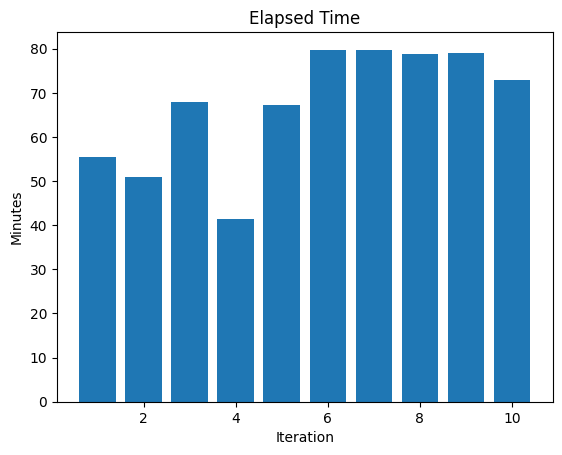

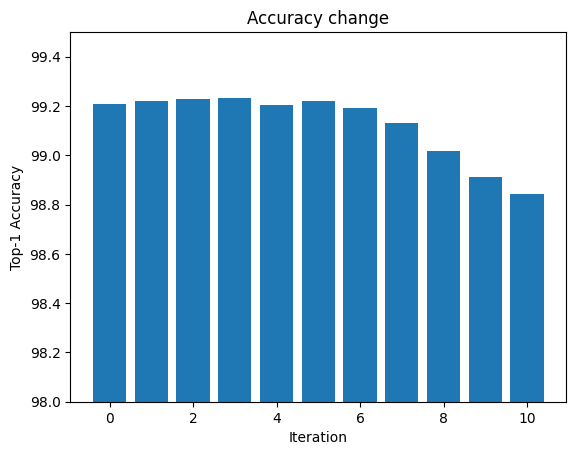

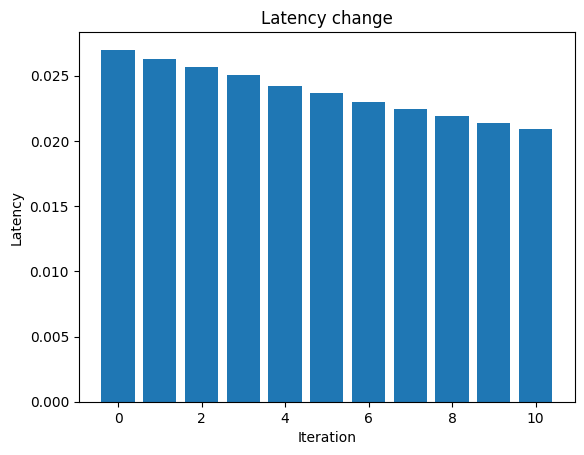

Files already downloaded and verified
Files already downloaded and verified
Files already downloaded and verified
Files already downloaded and verified
Files already downloaded and verified
Files already downloaded and verified
Files already downloaded and verified
Files already downloaded and verified
Files already downloaded and verified
Files already downloaded and verified
Files already downloaded and verified
Files already downloaded and verified
Files already downloaded and verified
Files already downloaded and verified
Files already downloaded and verified
Files already downloaded and verified
Files already downloaded and verified
Files already downloaded and verified
Files already downloaded and verified
Files already downloaded and verified
Files already downloaded and verified
Files already downloaded and verified


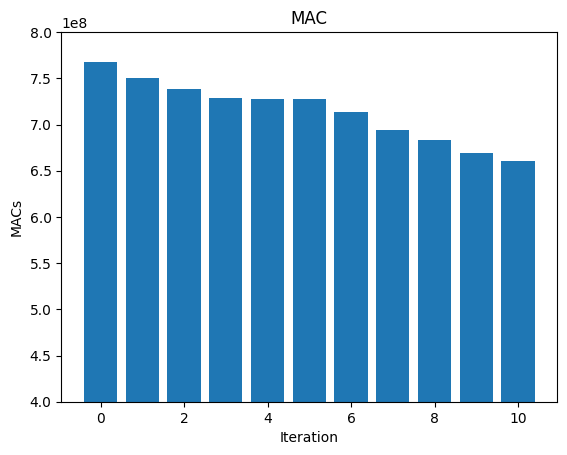

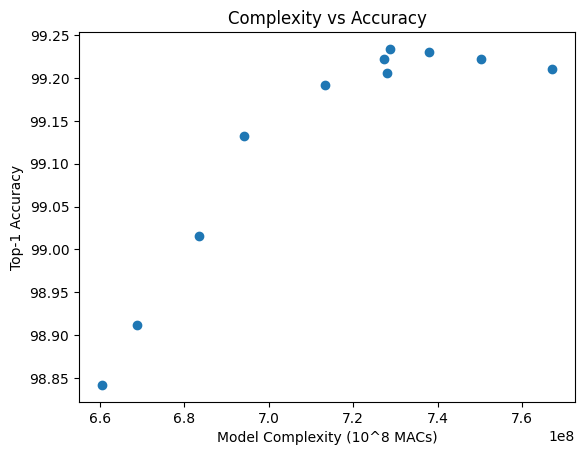

In [5]:
parent_folder = "models/alexnet/fed/test-1-prune-by-latency"

latency_logs = open(os.path.join(parent_folder,"logs.txt"),"r").read()
latency_logs

elapsed_times = [float(line.split(" ")[-2])/60 for line in list(filter(lambda line: "Iteration" in line and "finished" in line, latency_logs.split("\n")))]
idx = np.arange(1,len(elapsed_times)+1)

#Elapsed Time
plt.bar(idx, elapsed_times)
plt.xlabel("Iteration")
plt.ylabel("Minutes")
plt.title("Elapsed Time")
plt.show()

#Accuracy vs Latency
latency_best_models = pd.read_csv(os.path.join(parent_folder,"master/history.txt"), delimiter=",")

plt.bar(latency_best_models["Iteration"], latency_best_models["Accuracy"])
plt.ylim(98,99.5)
plt.xlabel("Iteration")
plt.ylabel("Top-1 Accuracy")
plt.title("Accuracy change")
plt.show()

plt.bar(latency_best_models["Iteration"], latency_best_models["Resource"])
plt.xlabel("Iteration")
plt.ylabel("Latency")
plt.title("Latency change")
plt.show()

#Best model each iteration
model_paths = glob.glob(os.path.join(parent_folder,"master/*.pth.tar"))

flops_arr = []
idx = []

for model_path in model_paths:
    model = torch.load(model_path)
    network_utils = networkUtils.__dict__["alexnet"](model, (3,224,224), "data/")
    network_def = network_utils.get_network_def_from_model(model)
    flops = network_utils._compute_weights_and_flops(network_def)
    total_flops = flops[1] + flops[3]
    flops_arr.append(total_flops)
    idx.append(int(Path(model_path).stem.split("_")[1]))

plt.bar(idx, flops_arr)
plt.ylim(4*10**8,8*10**8)
plt.xlabel("Iteration")
plt.ylabel("MACs")
plt.title("MAC")
plt.show()

#Accuracy vs MAC
flops_ordered = [x for y, x in sorted(zip(idx, flops_arr))]
acc = latency_best_models["Accuracy"].tolist()

plt.scatter(flops_ordered, acc)
plt.ylabel("Top-1 Accuracy")
plt.xlabel("Model Complexity (10^8 MACs)")
plt.title("Complexity vs Accuracy")
plt.show()

# bar chart client kırılımları

/tmp/ipykernel_596073/3830254530.py:4: FutureWarning:

The provided callable <function mean at 0x7fee604f4550> is currently using SeriesGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass 'mean' instead.



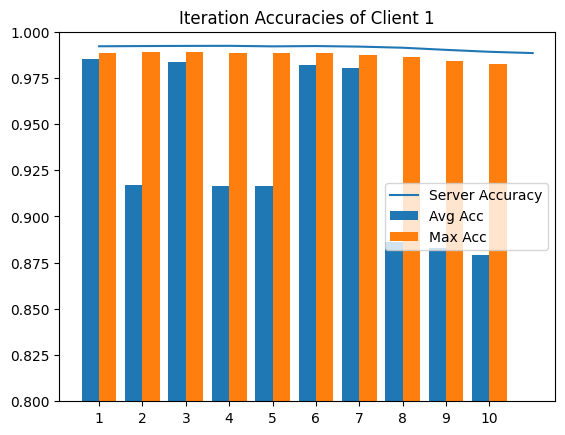

/home/goktug/python_envs/easyfl/lib/python3.10/site-packages/plotly/express/_core.py:2044: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



In [9]:
parent_folder = "models/alexnet/fed/test-1-prune-by-latency"

client_1_data = pd.read_csv(os.path.join(parent_folder,"client_1","logs.txt"))
agg_1 = client_1_data.groupby("Iteration").agg(mean_acc = ("Accuracy", np.mean), max_acc = ("Accuracy", np.amax))

iteration = np.asarray(agg_1.index.tolist())
width = 0.4
plt.bar(iteration-0.2, agg_1["mean_acc"], width, label="Avg Acc")
plt.bar(iteration+0.2, agg_1["max_acc"], width, label="Max Acc")
plt.plot(latency_best_models["Iteration"] + 1, latency_best_models["Accuracy"] / 100, label="Server Accuracy")
plt.xticks(iteration)
plt.ylim(0.8,1)
plt.legend()
plt.title("Iteration Accuracies of Client 1")
plt.show()



agg_2 = client_1_data.groupby(["Iteration", "Round"]).mean().reset_index()
agg_2["Round"] = agg_2["Round"].astype("category")

fig = px.bar(agg_2, x="Iteration", y="Accuracy", color="Round", barmode="group")
fig.show()


# parent_folder = "models/alexnet/fed/test-1-prune-by-latency"

# client_2_data = pd.read_csv(os.path.join(parent_folder,"client_2","logs.txt"))
# agg_2 = client_2_data.groupby("Iteration").agg(mean_acc = ("Accuracy", np.mean), max_acc = ("Accuracy", np.amax))

# iteration = np.asarray(agg_2.index.tolist())
# width = 0.4
# plt.bar(iteration-0.2, agg_2["mean_acc"], width, label="Avg Acc")
# plt.bar(iteration+0.2, agg_2["max_acc"], width, label="Max Acc")
# plt.plot(latency_best_models["Iteration"] + 1, latency_best_models["Accuracy"] / 100, label="Server Accuracy")
# plt.xticks(iteration)
# plt.ylim(0.8,1)
# plt.legend()
# plt.title("Iteration Accuracies of Client 2")
# plt.show()

In [10]:
client_1_data

,Iteration,Block,Round,Accuracy,Loss
0,1,0,1,0.97254,6.541503
1,1,0,2,0.96964,6.779131
2,1,0,3,0.97116,6.725528
3,1,1,1,0.98848,3.488675
4,1,1,2,0.98804,3.532927
...,...,...,...,...,...
205,10,5,2,0.98114,12.283453
206,10,5,3,0.98252,12.262839
207,10,6,1,0.30008,240.907408
208,10,6,2,0.30000,240.906541
